# QAOA for Max Cut, Toy Example
In this notebook the QAOA method is used to solve a small max cut problem. The quantum circuit used is shown and the approximation ratio for depth = 1 is  computed. 

# Importing necessary modules

In [7]:
#run: pip install openquantumcomputing
from openquantumcomputing.QAOAMaxCut import QAOAMaxCut
from qiskit import *
import numpy as np
import networkx as nx

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

# Creating problem instance

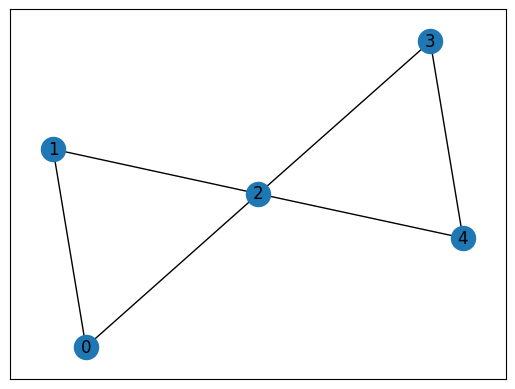

In [8]:
V = np.arange(0,5,1)
E = [(0,1,1.0),(0,2,1.0),(1,2,1.0),(3,2,1.0),(3,4,1.0),(4,2,1.0)] 

G = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

pos = nx.spring_layout(G)
nx.draw_networkx(G,pos=pos)
k_cuts=2

# Creating a QAOA instance and drawing the quantum circuit

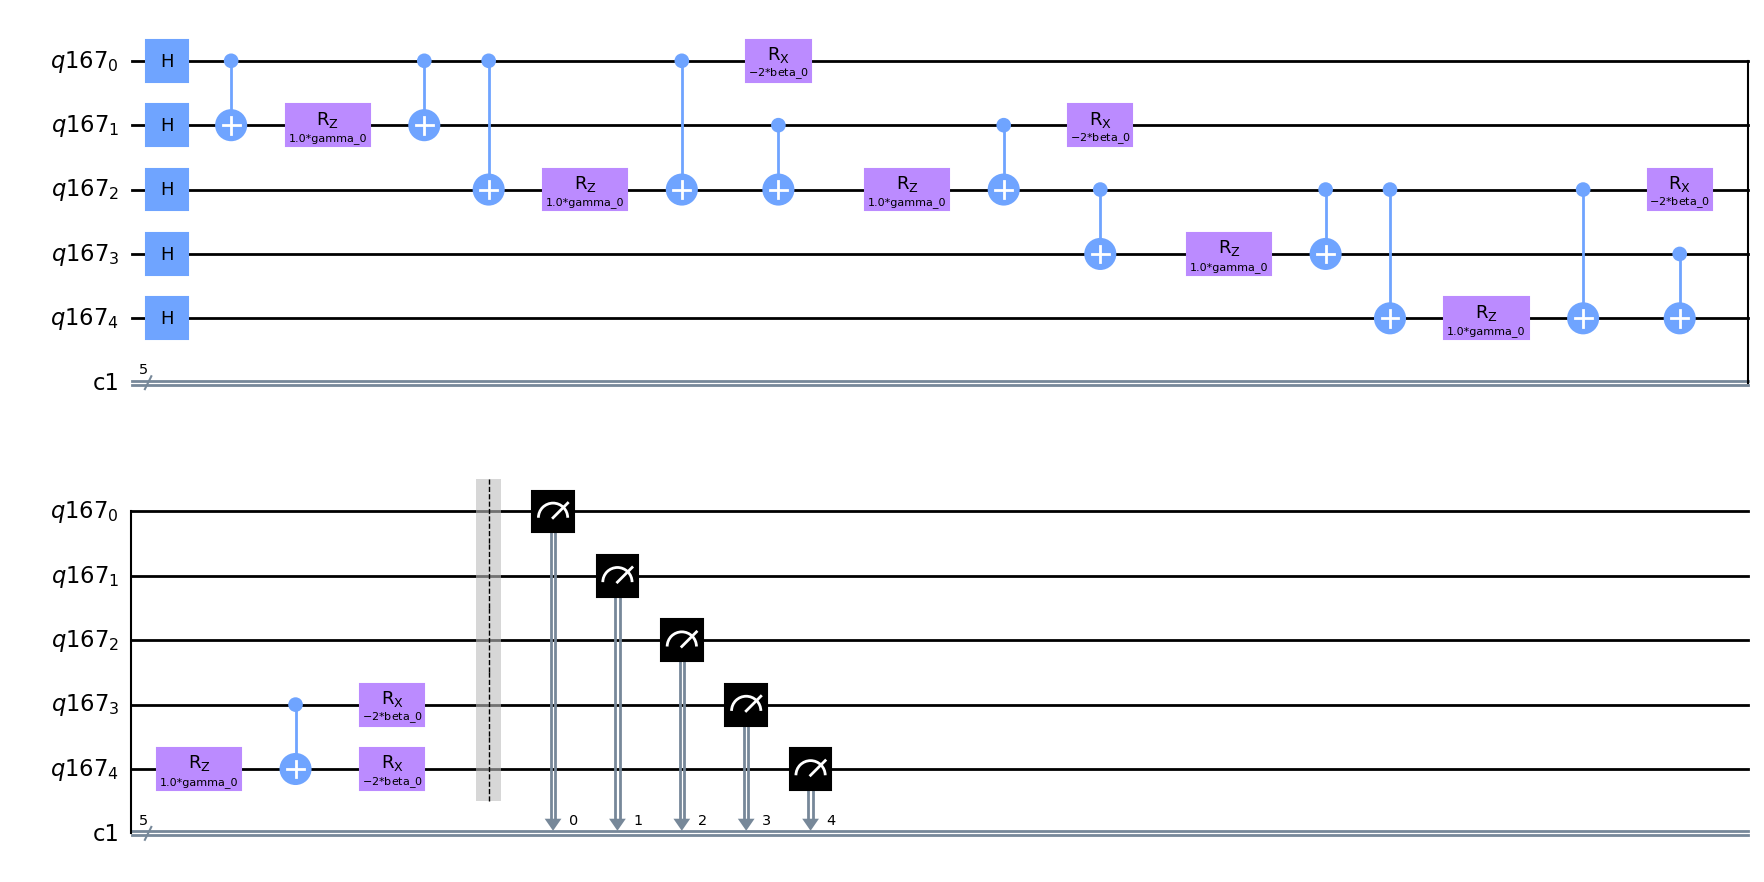

In [9]:
params={'G': G, 'shots': 2048}
qaoamc = QAOAMaxCut(params=params)
qaoamc.createParameterizedCircuit(1) #createParameterizedCircuit(depth) must be called to create circuit before drawing.
                                     #The argument "1" of the function is the depth of the circuit
qaoamc.parameterized_circuit.draw(output = 'mpl')

# Sample and plot cost landscape

Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done


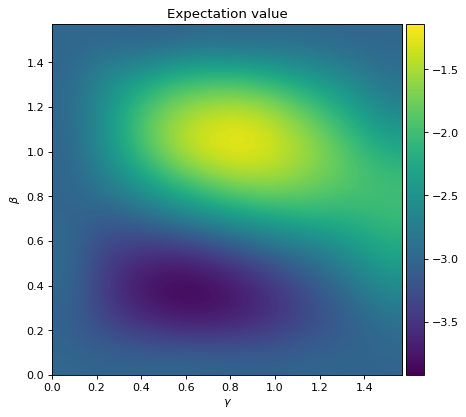

In [10]:
qaoamc.sample_cost_landscape(angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoamc.E,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

# Search for the best parameters at depth = 1 and plot histogram

cost(depth= 1 )= -3.9316406250000004


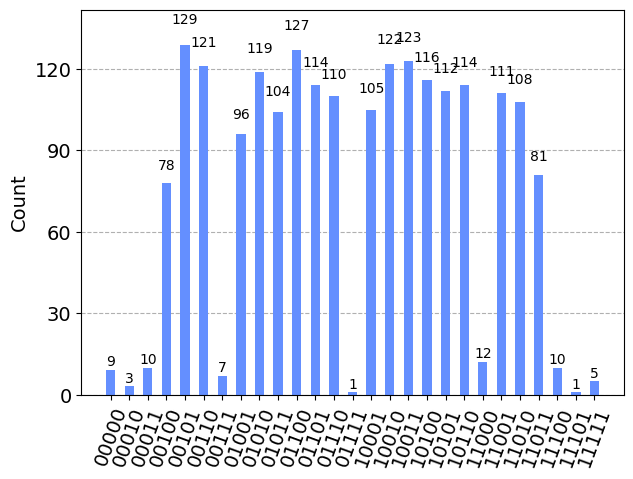

In [11]:
qaoamc.increase_depth() #Search for the best parameters at depth = 1
histogram = qaoamc.hist(qaoamc.angles_hist['d'+str(1)+'_final']) 
plot_histogram(histogram)


# Compute and print approximation ratio

In [12]:
print("approximation ratio=", list(qaoamc.costval.values())[0]/-4) 

approximation ratio= 0.98388671875
